In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [3]:
#reading the CSV
Air_Quality=pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
#Conversting series to Dataframe
Air_Quality_DF=pd.DataFrame(Air_Quality)

In [5]:
#Analysing the summary
Air_Quality.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [6]:
#Finding number of unique year
Air_Quality_DF["year"].nunique()

5

In [7]:
Air_Quality_DF["year"].unique()

array([2010, 2011, 2012, 2013, 2014], dtype=int64)

In [8]:
#Understanding the number of rows and columns
Air_Quality_DF.shape

(43824, 13)

In [9]:
Air_Quality_DF.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [10]:
Air_Quality_DF['pm2.5'].max()

994.0

In [11]:
Air_Quality_DF[Air_Quality_DF['pm2.5']>500]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
1057,1058,2010,2,14,1,980.0,-14,-7.0,1029.0,cv,0.89,0,0
1059,1060,2010,2,14,3,599.0,-14,-6.0,1030.0,NW,6.26,0,0
1876,1877,2010,3,20,4,700.0,2,6.0,1000.0,NW,4.92,0,0
1930,1931,2010,3,22,10,784.0,-8,11.0,1013.0,NW,11.18,0,0
1931,1932,2010,3,22,11,761.0,-10,12.0,1013.0,NW,18.33,0,0
6693,6694,2010,10,6,21,503.0,14,15.0,1014.0,SE,0.89,0,0
6694,6695,2010,10,6,22,534.0,15,15.0,1014.0,NE,0.89,0,0
6695,6696,2010,10,6,23,506.0,15,15.0,1014.0,NE,1.78,0,0
6696,6697,2010,10,7,0,505.0,14,15.0,1015.0,NE,2.67,0,0
7698,7699,2010,11,17,18,503.0,-1,3.0,1022.0,cv,0.45,0,0


In [12]:
#Converting the Categorical variable
number = LabelEncoder()
Air_Quality_DF["cbwd"] = number.fit_transform(Air_Quality_DF["cbwd"].astype('str'))
Air_Quality_DF["cbwd"]

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       3
16       1
17       1
18       0
19       1
20       3
21       1
22       1
23       3
24       2
25       2
26       2
27       2
28       2
29       2
        ..
43794    0
43795    1
43796    1
43797    1
43798    1
43799    1
43800    1
43801    1
43802    1
43803    1
43804    1
43805    1
43806    1
43807    1
43808    1
43809    1
43810    1
43811    1
43812    1
43813    1
43814    1
43815    1
43816    1
43817    1
43818    1
43819    1
43820    1
43821    1
43822    1
43823    1
Name: cbwd, Length: 43824, dtype: int64

In [12]:
Air_Quality_DF.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [13]:
#Finding and Filling the NaN Values with mode

In [14]:
Air_Quality['pm2.5'].fillna(Air_Quality['pm2.5'].mode()[0],inplace=True)

In [15]:
mode_df=Air_Quality['pm2.5'].mode()

In [16]:
mode_df

0    16.0
dtype: float64

In [17]:
Air_Quality_DF['pm2.5'].mean()


94.7166849215042

In [18]:
Air_Quality_DF['pm2.5'].median()

68.0

In [19]:
Air_Quality_DF.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [20]:
mode_df=Air_Quality['pm2.5'].mode()
mode_df[0]

16.0

In [21]:
Air_Quality_DF['pm2.5']=Air_Quality_DF['pm2.5'].fillna(mode_df[0])

In [22]:
Air_Quality_DF.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,16.0,-21,-11.0,1021.0,1,1.79,0,0
1,2,2010,1,1,1,16.0,-21,-12.0,1020.0,1,4.92,0,0
2,3,2010,1,1,2,16.0,-21,-11.0,1019.0,1,6.71,0,0
3,4,2010,1,1,3,16.0,-21,-14.0,1019.0,1,9.84,0,0
4,5,2010,1,1,4,16.0,-20,-12.0,1018.0,1,12.97,0,0


In [23]:
#Understanding the relationships bwtween columns

Text(0,0.5,'Range')

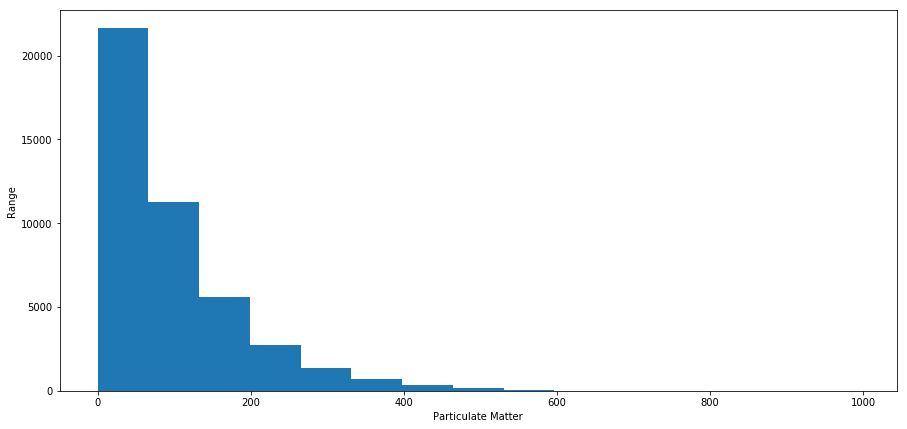

In [24]:
plt.figure(figsize=(15,7))
plt.hist(Air_Quality_DF['pm2.5'], bins=15)
plt.xlabel('Particulate Matter')
plt.ylabel('Range')

<BarContainer object of 43824 artists>

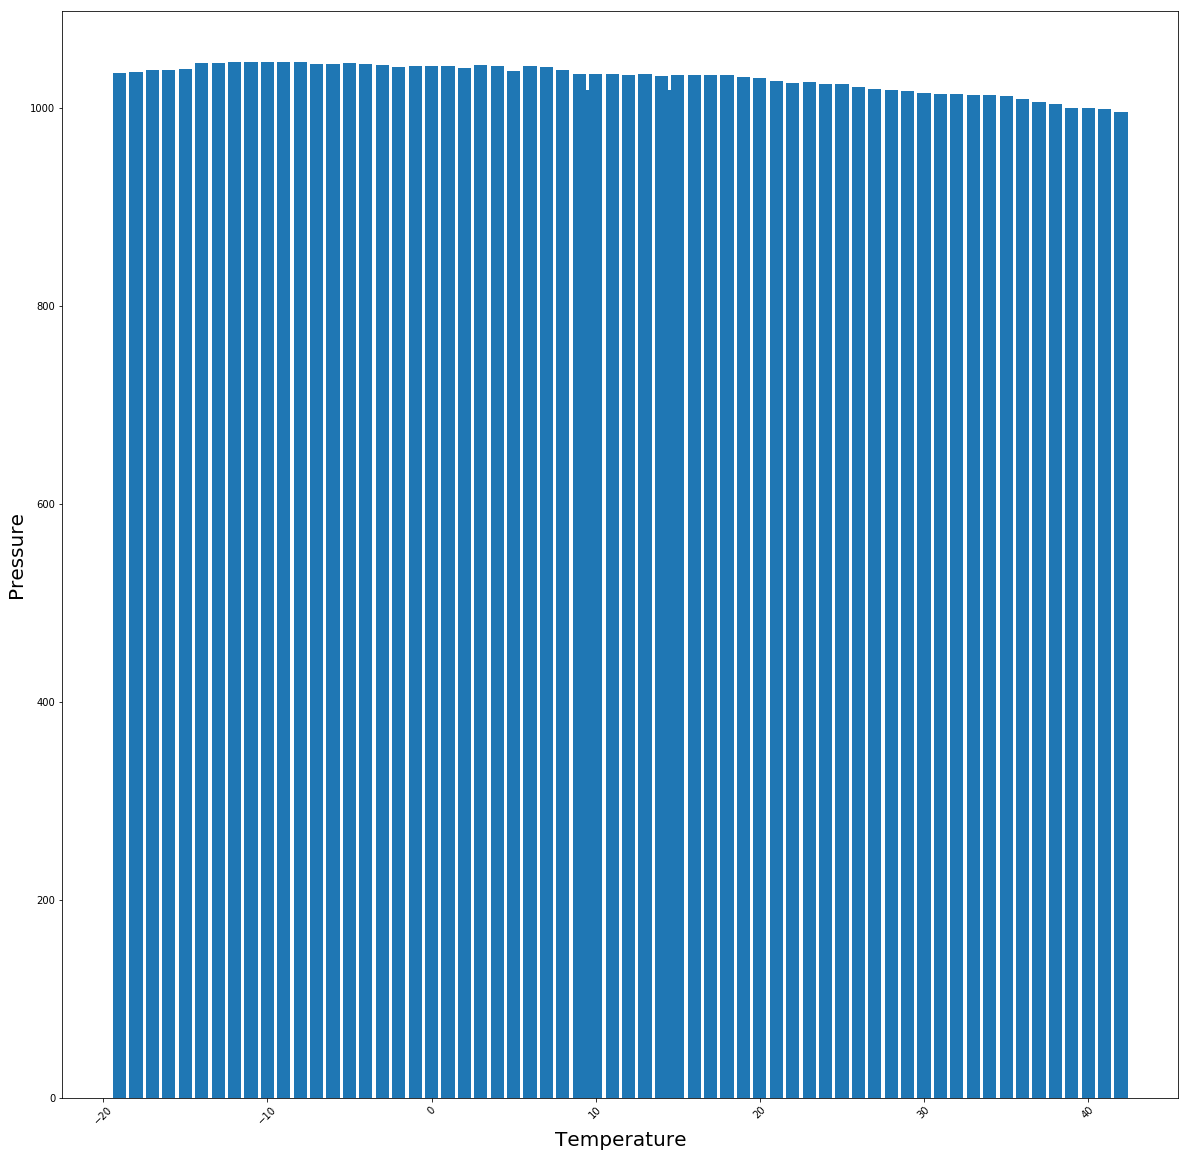

In [25]:
x=Air_Quality_DF["TEMP"]
y=Air_Quality_DF["PRES"]
plt.figure(figsize=(20,20))
plt.xticks(rotation=45)
plt.xlabel("Temperature",fontsize=20)
plt.ylabel("Pressure",fontsize=20)
plt.bar(x,y)

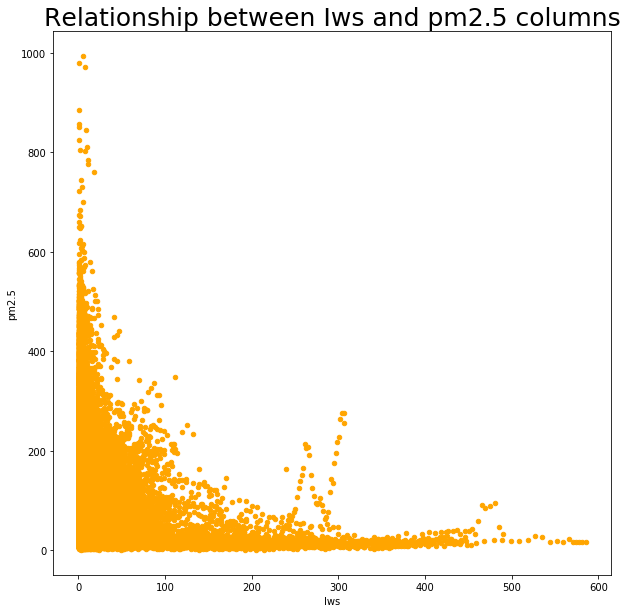

In [26]:
x=Air_Quality_DF['Iws']
y=Air_Quality_DF['pm2.5']
plt.figure(figsize=(10,10))
plt.scatter(x,y,marker='o',s=20,color= "Orange")
plt.xlabel("Iws")
plt.ylabel("pm2.5")
plt.title("Relationship between Iws and pm2.5 columns",fontsize=25)
plt.show()

In [72]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [73]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(Air_Quality_DF, Air_Quality_DF["pm2.5"],
                                                    train_size=0.75,
                                                    random_state=4)

C:\Users\shami\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [60]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(X_train,y_train)
lasso_predict = lasso.predict(X_test)
print('Lasso score: ',lasso.score(X_test,y_test))
#print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.960969797700079


In [61]:
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
print('Ridge score: ',ridge.score(X_test,y_test))

Ridge score:  0.9908988937999711


In [75]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

NameError: name 'LinearRegression' is not defined

In [77]:
scores = cross_val_score(my_pipeline, X_train, y_train, scoring='neg_mean_absolute_error')
print(scores)

NameError: name 'my_pipeline' is not defined

In [44]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
#Prediction: 
#RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [37]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.34008762322015335


In [ ]:
#2 GradientBoostingClassifier

In [42]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
   

In [ ]:
 print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

In [ ]:
#3 Lightgbm-XG Boost

In [38]:
import lightgbm as lgbm

In [39]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Air_Quality_DF, Air_Quality_DF["pm2.5"],
                                                    train_size=0.75,
                                                    random_state=4)

C:\Users\shami\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
train_set = lgbm.Dataset(X_train, y_train, silent=True)
train_set

In [42]:
pred_test_y = np.zeros(X_test.shape[0])
pred_test_y.shape

(10956,)

In [43]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [44]:
print(model)

In [45]:
pred_test_y = model.predict(X_test, num_iteration = model.best_iteration)

In [46]:
print(pred_test_y)

[ 18.45821458 109.45744968 102.69885012 ...  44.63278937  30.84134703
 119.91116321]


In [48]:
import xgboost as xgb 

In [49]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [50]:
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [51]:
xb = xgb.train(params, dtrain, num_rounds)
y_pred_xgb = xb.predict(dtest)
print(y_pred_xgb)

[ 14.808563 102.561874  98.75477  ...  40.651924  27.737234 101.59399 ]
